<a href="https://colab.research.google.com/github/tcruz88/CNN_project/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import os
import cv2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


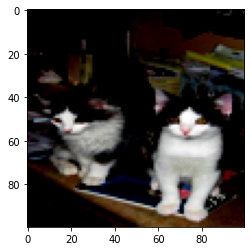

[1. 0.]
[[[-0.3254902  -0.44313725 -0.70196078]
  [-0.3254902  -0.44313725 -0.70196078]
  [-0.3254902  -0.44313725 -0.70196078]
  ...
  [-0.36470588 -0.41176471 -0.54509804]
  [-0.29411765 -0.29411765 -0.34117647]
  [-0.27058824 -0.21568627 -0.12941176]]

 [[-0.3254902  -0.44313725 -0.70196078]
  [-0.3254902  -0.44313725 -0.70196078]
  [-0.3254902  -0.44313725 -0.70196078]
  ...
  [-0.52941176 -0.60784314 -0.67058824]
  [-0.18431373 -0.21568627 -0.22352941]
  [ 0.18431373  0.22352941  0.2627451 ]]

 [[-0.33333333 -0.45098039 -0.70980392]
  [-0.3254902  -0.44313725 -0.70196078]
  [-0.3254902  -0.44313725 -0.70196078]
  ...
  [-0.4745098  -0.65490196 -0.67058824]
  [-0.30980392 -0.45098039 -0.49019608]
  [-0.2        -0.2627451  -0.34117647]]

 ...

 [[-0.88235294 -0.82745098 -0.82745098]
  [-0.82745098 -0.85098039 -0.89019608]
  [-0.85098039 -0.88235294 -0.8745098 ]
  ...
  [ 0.16862745  0.01176471 -0.14509804]
  [ 0.15294118 -0.00392157 -0.16078431]
  [ 0.19215686  0.02745098 -0.105882

In [3]:
#image data shape (n, width, height, rgb value)

X = [] # Images
Y = [] # Categories

folder_cat = 'cats'
folder_dog = 'dogs'

name_encode = {"cat":0, "dog":1}

def images_to_array(folder, name):
    for image in os.listdir(folder):
        loaded_image = Image.open(os.path.join(folder, image))  #loading image
        resized_image = Image.Image.resize(loaded_image, [100,100]) #resize image to 100 x 100 px
        image_array = np.array(resized_image) # transform image into an array
        X.append(image_array) # append images to array X
        Y.append(name_encode[name]) #append category

        image_flipped = cv2.flip(image_array,1) #create copies of images flipped horizontally to improve model accuracy
        X.append(image_flipped)
        Y.append(name_encode[name])

        # image_blurred = cv2.blur(image_array,(2,2)) #create copies of images blurred to improve accuracy
        # X.append(image_blurred)
        # Y.append(name_encode[name])

        # image_flipped_blurred = cv2.blur(image_flipped,(2,2)) #create copies of images flipped horizontally & blurred to improve accuracy
        # X.append(image_flipped_blurred)
        # Y.append(name_encode[name])

def show_image(index):
    plt.imshow(X[index]) # plt.imshow(np.uint8(X[index])) 
    plt.show()
    print(Y[index])

images_to_array(folder_cat, "cat")
images_to_array(folder_dog, "dog")

Y = to_categorical(Y, num_classes=2)
X = (np.array(X) - 127.5) / 127.5 #normalization of data

show_image(0)
print(X[0])

In [4]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPool2D, BatchNormalization, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, (5,5), padding='same',activation='relu', input_shape=(100,100,3) ))
model.add(BatchNormalization())
model.add(Dropout(rate=0.50)) # muting 1/3 of trainable parameters
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(100, (5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.50)) # muting 1/3 of trainable parameters
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(100, (5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.50)) 
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(124))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 100)       80100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 100)       400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 100)       0

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1)

print(X[10])

[[[-0.67058824 -0.6627451  -0.70196078]
  [-0.67058824 -0.6627451  -0.70196078]
  [-0.65490196 -0.64705882 -0.68627451]
  ...
  [ 0.05098039  0.02745098 -0.1372549 ]
  [ 0.11372549 -0.00392157 -0.18431373]
  [ 0.31764706  0.15294118 -0.02745098]]

 [[-0.69411765 -0.68627451 -0.7254902 ]
  [-0.67843137 -0.67058824 -0.70980392]
  [-0.67058824 -0.6627451  -0.70196078]
  ...
  [-0.05882353 -0.18431373 -0.38823529]
  [ 0.14509804 -0.01960784 -0.24705882]
  [ 0.27843137  0.09019608 -0.12156863]]

 [[-0.69411765 -0.68627451 -0.7254902 ]
  [-0.69411765 -0.68627451 -0.7254902 ]
  [-0.68627451 -0.67843137 -0.71764706]
  ...
  [ 0.02745098 -0.2        -0.39607843]
  [ 0.14509804 -0.01960784 -0.25490196]
  [ 0.31764706  0.17647059 -0.03529412]]

 ...

 [[-0.05882353 -0.29411765 -0.43529412]
  [-0.02745098 -0.27058824 -0.41960784]
  [ 0.00392157 -0.24705882 -0.40392157]
  ...
  [-0.82745098 -0.82745098 -0.84313725]
  [-0.81176471 -0.81176471 -0.81960784]
  [-0.81176471 -0.81176471 -0.82745098]]

 [

Epoch 1/15
225/225 [==============================] - 48s 62ms/step - loss: 1.8478 - acc: 0.5608 - val_loss: 4.3856 - val_acc: 0.4913
Epoch 2/15
225/225 [==============================] - 11s 48ms/step - loss: 0.5877 - acc: 0.6795 - val_loss: 2.1743 - val_acc: 0.5394
Epoch 3/15
225/225 [==============================] - 11s 48ms/step - loss: 0.5051 - acc: 0.7429 - val_loss: 0.7806 - val_acc: 0.6562
Epoch 4/15
225/225 [==============================] - 11s 49ms/step - loss: 0.4383 - acc: 0.7862 - val_loss: 0.7461 - val_acc: 0.6875
Epoch 5/15
225/225 [==============================] - 11s 49ms/step - loss: 0.3780 - acc: 0.8303 - val_loss: 1.1921 - val_acc: 0.6469
Epoch 6/15
225/225 [==============================] - 11s 50ms/step - loss: 0.3295 - acc: 0.8546 - val_loss: 0.6861 - val_acc: 0.7487
Epoch 7/15
225/225 [==============================] - 11s 50ms/step - loss: 0.2752 - acc: 0.8825 - val_loss: 1.1167 - val_acc: 0.6800
Epoch 8/15
225/225 [==============================] - 11s 50ms

Text(0, 0.5, 'Accuracy')

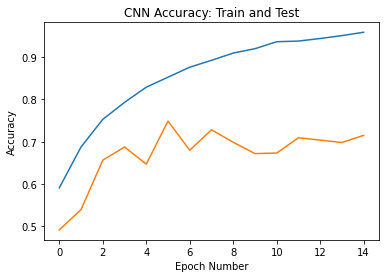

In [6]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
h = model.fit(X_train, y_train, batch_size=64, epochs=15, validation_data=(X_test,y_test))
model.save('catdog_CNN.h5')

plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title("CNN Accuracy: Train and Test")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')

Actual: CAT
3674


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: DOG
4704
Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: CAT
1521
Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: DOG
4672
Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: CAT
2417
Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: DOG
7704
Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: DOG
4368
Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: DOG
6189
Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: CAT
486
Prediction: CAT
*****************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: CAT
1803
Prediction: DOG
*****************


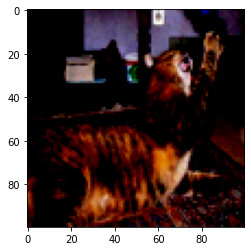

In [7]:
from keras.models import load_model

model = load_model('catdog_CNN.h5')

def prediction(index_number):
  img = np.array(X[index_number]) 
  img = img.reshape(1,100,100,3) # (n number of images, h, w, rgb)
  prediction = model.predict_classes(img)
  if prediction == 0:
    print('Prediction: CAT')
  elif prediction == 1:
    print('Prediction: DOG')
  else:
    print('Prediction: Error')
  plt.imshow(X[index_number])
  plt.show

import random
import time

for i in range(10):
     rand = random.randrange(0,7999)
     if rand < 4000:
        print('Actual: CAT')
     else:
        print('Actual: DOG')
     print(rand)
     prediction(rand)
     print('*****************')
     time.sleep(1) 

# Cat: 0 - 3999
# Dog: 4000 - 7999
# Cat = 0, Dog = 1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: CAT


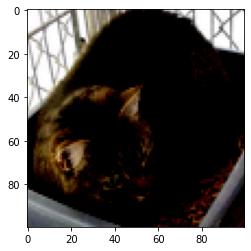

In [8]:
prediction(4134)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction: CAT


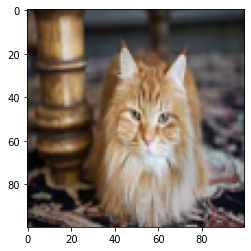

In [9]:
model = load_model('catdog_CNN.h5')

def prediction(image_path):
  img_loaded = Image.open(image_path)
  img_resized = Image.Image.resize(img_loaded, (100,100))
  img = np.array(img_resized) 
  img = img.reshape(1,100,100,3) # (n number of images, h, w, rgb)
  prediction = model.predict_classes(img)
  if prediction == 0:
    print('Prediction: CAT')
  elif prediction == 1:
    print('Prediction: DOG')
  else:
    print('Prediction: Error')
  plt.imshow(img_resized)
  plt.show

prediction('cat_sample.jpg')
# Cat: 0 - 3999
# Dog: 4000 - 7999
# Pedestrian = cat or 0, Road = dog or 1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction: DOG


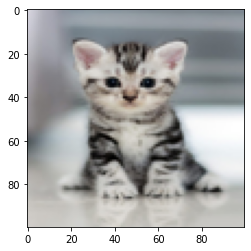

In [10]:
prediction('cat_sample_2.jpg')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction: CAT


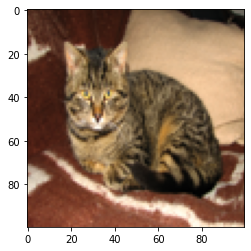

In [11]:
prediction('cat_sample_3.jpg')

Prediction: DOG


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


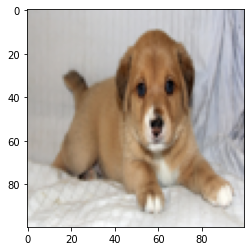

In [12]:
prediction('dog_sample.jpg')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction: CAT


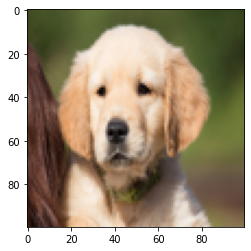

In [13]:
prediction('dog_sample_2.jpg')

Prediction: DOG


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


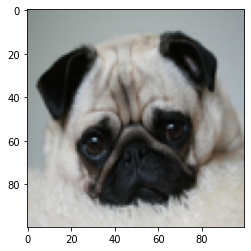

In [14]:
prediction('dog_sample_3.jpg')